In [1]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('train.csv')
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
data_prepared = data.drop(['Ticket','Cabin','Embarked'], axis =1)
data_prepared = data_prepared.fillna(value = np.mean(data['Age']))
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [23]:
data_prepared['Male'] = data_prepared['Sex'] == 'male'
data_prepared = data_prepared.drop('Sex', axis=1)
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Male         891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 56.7+ KB


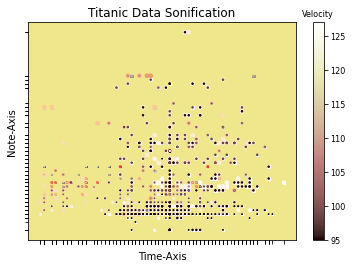

In [91]:
import matplotlib.pyplot as plt
colors = data_prepared['SibSp'].values + data_prepared['Parch'].values 
colors = np.round(colors/(max(colors)-min(colors))*32+95)
area = (max(data_prepared['Pclass']+1)-data_prepared['Pclass'].values)
area_t = data_prepared['Survived'].values + (1-data_prepared['Male'].values)
area1 = np.ma.masked_where(area_t == 2 , area)
area2 = np.ma.masked_where(area_t == 0, area)
area3 = np.ma.masked_where(area_t == 1, area)
fig, ax = plt.subplots()
min_note= 30
max_note= 80
note_range = max_note-min_note
time_range = 64
x = np.log(data_prepared['Age'].values+np.mean(data_prepared['Age']))
x = np.round((x-np.min(x))/(np.max(x)-np.min(x))*time_range)
y = np.log(data_prepared['Fare'].values+ np.mean(data_prepared['Fare']))
y = np.round((y-np.min(y))/(np.max(y)-np.min(y))*note_range + min_note)
plt.scatter(x ,y ,s = area1*2, c = colors , marker = 's', cmap ='Greys')
plt.scatter(x ,y ,s = area2*4, c = colors , marker = 'o', cmap = 'OrRd') #area multipication is just for image beauty
plt.scatter(x ,y ,s = area3*1, c = colors , marker = 'p', cmap = 'pink')
clb = plt.colorbar()
ax.set_facecolor('khaki')
plt.xlabel("Time-Axis")
plt.ylabel("Note-Axis")
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Velocity',fontsize=8)
plt.title("Titanic Data Sonification")
plt.yticks(y,[])
plt.xticks(x,[])
plt.show()
#fig.savefig('Sonification Plot.jpg', facecolor = 'white',dpi = 1000)

In [87]:
print(x.shape,area_t.shape)
y[890]

(891,) (891,)


28.0

In [92]:
from midiutil import MIDIFile
bpm = 64
midifile = MIDIFile(adjust_origin=True)
midifile.addTempo(track=0, time=0, tempo=bpm)
notes={"x"}
for j in range(len(x)):
    if area_t[j] == 2:
        if (int(y[j]),int(x[j])) not in notes:
            midifile.addNote(track= 0, channel=0, pitch=int(y[j]), time=int(x[j]), duration=int(area[j]), volume=int(colors[j]))
            notes.add((int(y[j]),int(x[j])))
with open("stds2.mid", "wb") as f:
    midifile.writeFile(f)